IMPORTING THE LIBRARIES

In [291]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

In [292]:
data = pd.read_csv('Diagnosis.csv')

# NULL VALUES CHECK

In [293]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

We could see there are no null values in this dataset

# DESCRIPTION OF THE DATA

In [294]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


We could drop the ID column as it doesn't provide much insight

In [295]:
data = data.drop(['id'],1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


# OUTLIER CHECKING

In [296]:
data_outlier = data.drop(['diagnosis'],1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


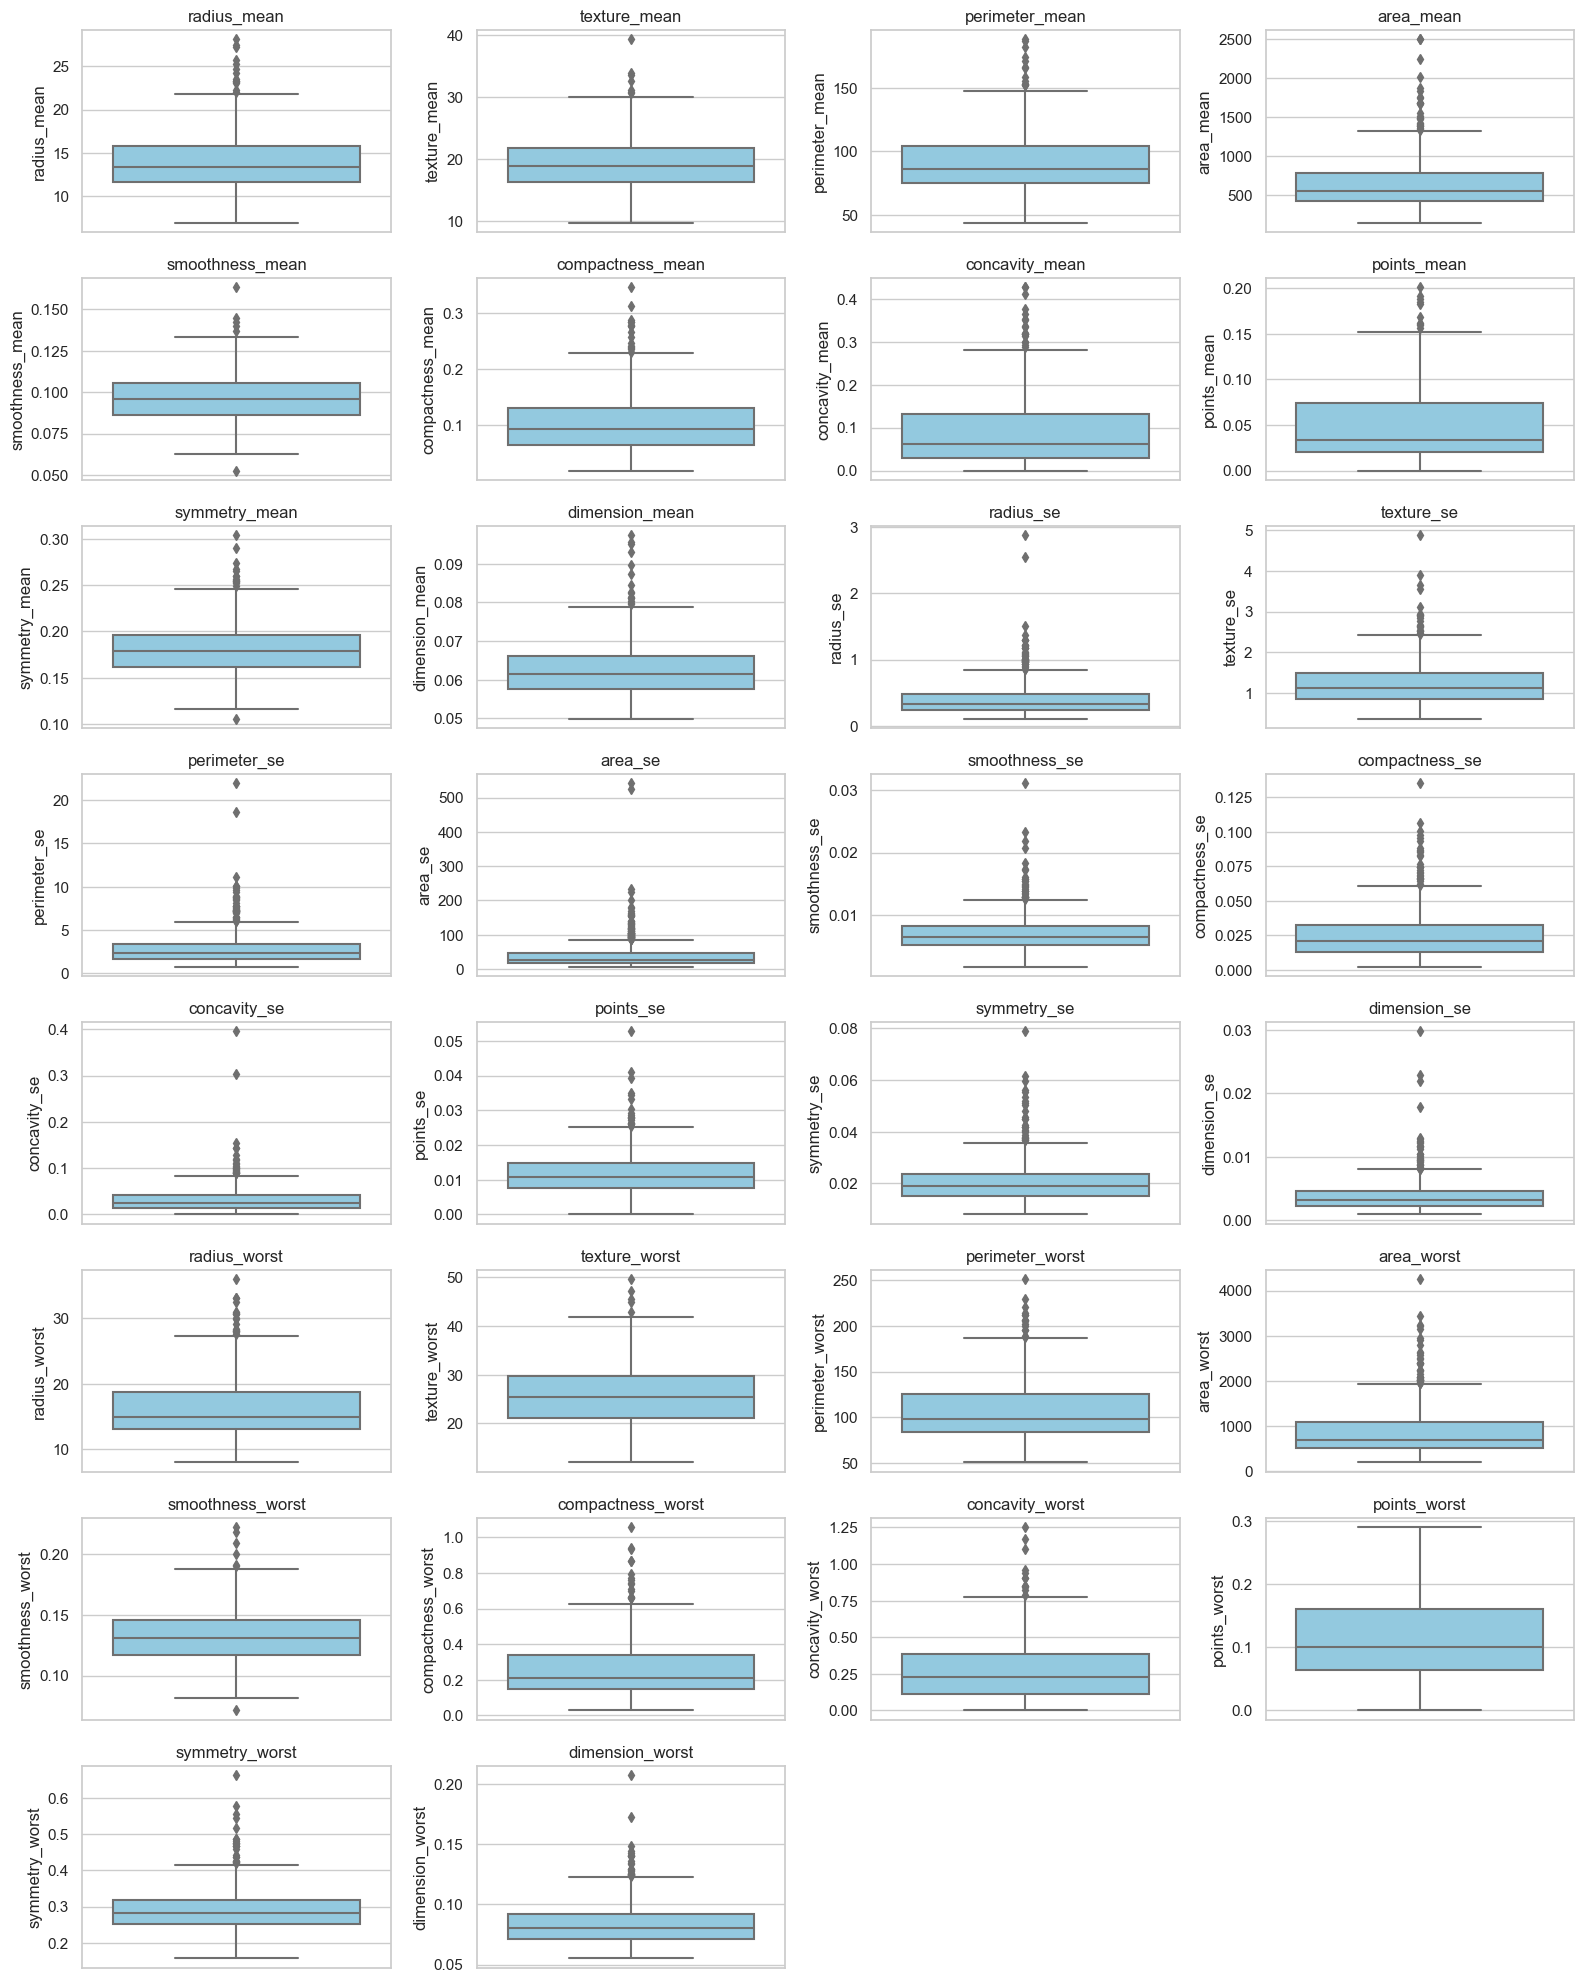

In [297]:
# Box Plots for Outliers
plt.figure(figsize=(16, 20))
sns.set(style='whitegrid')

num_rows = 8
num_cols = 4

for i, column in enumerate(data_outlier.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data_outlier[column], color='skyblue')
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We could see most of the columns have outliers

# SCALING THE DATASET

Due to the presence of outliers robust scaler is used

In [298]:
# Mapping B and M to 0's and 1's
data['diagnosis'] = data['diagnosis'].map({'B':0,'M':1})

In [299]:
# Using Robust Scaler
rs = RobustScaler()

In [300]:
data = rs.fit_transform(data)

In [301]:
data_scaled = pd.DataFrame(data,columns=rs.feature_names_in_)

In [302]:
data_scaled

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.0,-0.257353,-1.145648,-0.255444,-0.240066,0.366086,-0.348503,-0.214257,0.065189,0.494083,...,-0.254325,-1.130787,-0.258900,-0.241604,0.244898,-0.444502,-0.381893,-0.062403,0.007407,-0.597963
1,0.0,-0.678922,0.019538,-0.586243,-0.564845,0.053354,0.337049,0.023037,-0.131868,0.384615,...,-0.534602,-0.285880,-0.469363,-0.460172,-0.340136,0.206357,-0.130775,-0.214264,0.174815,-0.202231
2,0.0,-0.571078,-0.357016,-0.529554,-0.490894,0.624934,-0.222816,-0.307297,-0.162041,-0.230769,...,-0.442907,0.119213,-0.429402,-0.378231,0.190476,-0.331944,-0.447094,-0.265575,0.260741,-0.059651
3,0.0,-0.512255,-0.968028,-0.457656,-0.458885,1.084522,0.320250,-0.150188,0.269324,-0.062130,...,-0.527682,-1.115741,-0.511746,-0.443995,0.183673,-0.154768,-0.521647,-0.143257,-1.066667,-0.591659
4,0.0,0.446078,-1.000000,0.394400,0.443433,-0.857898,-0.355681,-0.272988,-0.129074,-0.210059,...,0.212803,-1.120370,0.165658,0.233163,-0.636054,-0.199062,-0.337183,-0.188141,-0.496296,-0.600388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.0,-0.049020,-0.110124,-0.067750,-0.038079,-1.120444,-0.499236,-0.128040,-0.089402,-1.000000,...,-0.012111,-0.175926,-0.062000,0.001934,-0.105442,-0.080250,-0.145678,0.047372,-0.869630,-0.523278
565,0.0,-0.762255,-0.733570,-0.692707,-0.633278,0.155837,-0.015883,-0.254400,-0.244552,-0.470414,...,-0.707612,-0.686343,-0.648341,-0.579216,0.159864,-0.251694,-0.577794,-0.613559,-0.574815,0.234724
566,1.0,0.468137,0.634103,0.438299,0.440121,-0.279979,0.191967,-0.077022,-0.016204,-0.192308,...,0.489619,0.303241,0.390894,0.503956,-0.040816,0.614904,0.507824,0.234995,0.522963,0.857420
567,0.0,0.284314,-0.863233,0.263394,0.256898,0.741152,-0.003207,0.073265,0.585770,-0.420118,...,0.143599,-0.981481,0.131751,0.111482,0.115646,-0.334028,-0.333085,0.072250,-0.320000,-0.094083


# TRAIN AND TEST SPLIT

In [303]:
# X and y variables
X = data_scaled.drop(['diagnosis'],1)
y = data_scaled['diagnosis']

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [304]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

# IMBALANCE TREATMENT 

In [305]:
y.value_counts()

0.0    357
1.0    212
Name: diagnosis, dtype: int64

The class is imbalanced so we need to treat the imbalance in the train data

In [306]:
smt = SMOTE()

In [307]:
# Applying smote to treat imbalance
X_train_treat,y_train_treat = smt.fit_resample(X_train,y_train)

In [308]:
y_train_treat.value_counts()

0.0    263
1.0    263
Name: diagnosis, dtype: int64

The imbalance in the train data is being treated

# TRAINING RANDOM FOREST BASE MODEL

In [309]:
rf = RandomForestClassifier()

In [310]:
rf.fit(X_train_treat,y_train_treat)

RandomForestClassifier()

In [311]:
rf_pred = rf.predict(X_test)

In [312]:
from sklearn import metrics

In [313]:
metrics.accuracy_score(y_test,rf_pred)

0.958041958041958

In [314]:
metrics.precision_score(y_test,rf_pred)

0.9574468085106383

In [315]:
metrics.recall_score(y_test,rf_pred)

0.9183673469387755

In [316]:
rf.score(X_train_treat,y_train_treat)

1.0

In [317]:
rf.score(X_test,y_test)

0.958041958041958

We could see that even though there are good accuracy, precision and recall scores the Random Forest model is slightly overfitting

# FEATURE IMPORTANCE

In [318]:
feature_importances = rf.feature_importances_

In [319]:
feature_importances

array([0.01903313, 0.01918174, 0.08770972, 0.03573156, 0.00473822,
       0.0085787 , 0.04372733, 0.09702058, 0.00331744, 0.00331569,
       0.01356128, 0.00439462, 0.00936954, 0.01864627, 0.00208374,
       0.0033432 , 0.00267251, 0.00582489, 0.00321355, 0.00427749,
       0.08627736, 0.01901918, 0.14900317, 0.1190008 , 0.01023671,
       0.00961988, 0.05605352, 0.14770922, 0.01034193, 0.00299704])

In [320]:
feature_importance = np.array(feature_importances)
feature_names = np.array(X_train_treat.columns)

In [321]:
len(feature_importance)

30

In [322]:
len(feature_names)

30

In [323]:
features={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(features)

Text(0, 0.5, 'Feature Names')

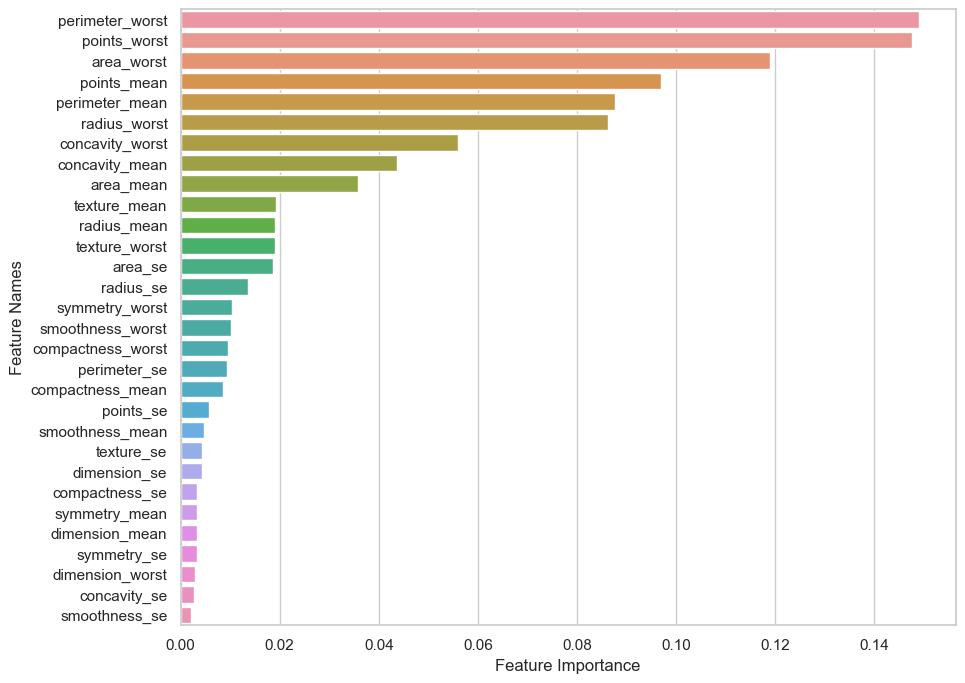

In [324]:
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
plt.figure(figsize=(10,8))
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

In [325]:
filtered_features = fi_df[fi_df['feature_importance'] >= 0.05]

In [326]:
filtered_features

,feature_names,feature_importance
22,perimeter_worst,0.149003
27,points_worst,0.147709
23,area_worst,0.119001
7,points_mean,0.097021
2,perimeter_mean,0.087710
20,radius_worst,0.086277
26,concavity_worst,0.056054


We could use columns only with high feature importance

# RE TRAINING RANDOM FOREST

In [327]:
list(filtered_features['feature_names'])

['perimeter_worst',
 'points_worst',
 'area_worst',
 'points_mean',
 'perimeter_mean',
 'radius_worst',
 'concavity_worst']

In [328]:
X_train_treat_filter = X_train_treat[list(filtered_features['feature_names'])]

In [329]:
X_train_treat_filter

,perimeter_worst,points_worst,area_worst,points_mean,perimeter_mean,radius_worst,concavity_worst
0,0.066360,-0.459210,0.084579,-0.300428,0.207743,0.074394,-0.296200
1,0.036328,-0.311599,-0.027959,-0.245670,0.055306,-0.022491,-0.343145
2,0.403003,0.388411,0.415509,0.481095,0.544763,0.437716,-0.207899
3,-0.831194,-0.637193,-0.732372,-0.194077,-0.950570,-0.961246,-0.269374
4,-0.092274,-0.120659,-0.108845,-0.246415,-0.274110,-0.117647,0.054396
...,...,...,...,...,...,...,...
521,1.630836,1.492581,2.134729,1.558743,1.496514,1.757408,1.644613
522,2.093881,1.390041,2.938005,1.130007,1.487620,2.103871,1.067466
523,2.165988,1.129967,3.302154,1.031330,1.884336,2.408880,0.401319
524,0.684500,1.156823,0.777975,1.369897,0.636635,0.725697,1.441452


In [330]:
X_test_filter = X_test[list(filtered_features['feature_names'])]

In [331]:
rf_filter = RandomForestClassifier()

In [332]:
rf_filter.fit(X_train_treat_filter,y_train_treat)

RandomForestClassifier()

In [333]:
rf_pred_filter = rf_filter.predict(X_test_filter)

In [334]:
metrics.accuracy_score(y_test,rf_pred_filter)

0.958041958041958

In [335]:
metrics.precision_score(y_test,rf_pred_filter)

0.9574468085106383

In [336]:
metrics.recall_score(y_test,rf_pred_filter)

0.9183673469387755

In [337]:
rf_filter.score(X_train_treat_filter,y_train_treat)

1.0

In [338]:
rf_filter.score(X_test_filter,y_test)

0.958041958041958

We could still see overfitting which can be rectified using hyper parameter tuning

# RANDOM FOREST HYPER PARAMETER TUNING

In [339]:
X_filter = X[list(filtered_features['feature_names'])]

In [342]:
from sklearn.model_selection import RandomizedSearchCV

In [343]:
# No of estimators
n_estimators=[1, 2, 4, 8, 16, 32, 64, 100, 200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,5,10,15]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Grid of parameters for Randomized Search CV
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [344]:
rf_random = RandomizedSearchCV(estimator = rf_filter, param_distributions= random_grid,cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_filter,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 2, 4, 8, 16, 32, 64,
                                                         100, 200]},
                   random_state=42, verbose=2)

In [345]:
rf_random.best_params_

{'n_estimators': 32,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5,
 'bootstrap': False}

# TRAINING THE RANDOM FOREST AGAIN AFTER PARAMETER TUNING

In [346]:
rf_tuned_filter = RandomForestClassifier(n_estimators=32,min_samples_split=10,min_samples_leaf=2,max_features='auto',max_depth=5,bootstrap=False)

In [347]:
rf_tuned_filter.fit(X_train_treat_filter,y_train_treat)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.


RandomForestClassifier(bootstrap=False, max_depth=5, max_features='auto',
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=32)

In [348]:
rf_tuned_filter_pred = rf_tuned_filter.predict(X_test_filter)

In [349]:
rf_acc = metrics.accuracy_score(y_test,rf_tuned_filter_pred)

rf_acc

0.951048951048951

In [350]:
rf_prec = metrics.precision_score(y_test,rf_tuned_filter_pred)

rf_prec

0.9375

In [351]:
rf_rec = metrics.recall_score(y_test,rf_tuned_filter_pred)

rf_rec

0.9183673469387755

In [352]:
rf_tuned_filter.score(X_train_treat_filter,y_train_treat)

0.9923954372623575

In [353]:
rf_tuned_filter.score(X_test_filter,y_test)

0.951048951048951

We could see that the hyper parameter tuning improved the model from Overfitting

# DECISION TREE MODEL WITH FILTERED FEATURES

In [354]:
from sklearn.tree import DecisionTreeClassifier

In [355]:
dt = DecisionTreeClassifier()

In [356]:
dt.fit(X_train_treat_filter,y_train_treat)

DecisionTreeClassifier()

In [357]:
dt_pred = dt.predict(X_test_filter)

In [358]:
metrics.accuracy_score(y_test,dt_pred)

0.8881118881118881

In [359]:
metrics.precision_score(y_test,dt_pred)

0.851063829787234

In [360]:
metrics.recall_score(y_test,dt_pred)

0.8163265306122449

In [361]:
dt.score(X_train_treat_filter,y_train_treat)

1.0

In [362]:
dt.score(X_test_filter,y_test)

0.8881118881118881

We could see that the Decision Tree model is Overfitting, this is expected as Decision Tree is a model which frequently tends to Overfit due to being only one tree.

# TUNING DECISION TREE MODEL

In [363]:
# Criterion for tree
criterion = ['gini','entropy']
# Splitter for tree
splitter = ['random','best']
# Maximum levels of  trees
max_depth = [2,5,10,15]
# Maximum number of samples required to split a node
max_leaf_nodes = [2, 5, 10]
# Maximum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree

random_grid = {'criterion': criterion,
               'splitter': splitter,
               'max_depth': max_depth,
               'max_leaf_nodes': max_leaf_nodes,
               'min_samples_leaf': min_samples_leaf}

In [366]:
# Importing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
dt_random.fit(X_filter,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 10, 15],
                                        'max_leaf_nodes': [2, 5, 10],
                                        'min_samples_leaf': [1, 2, 4],
                                        'splitter': ['random', 'best']},
                   random_state=42, verbose=2)

In [367]:
dt_random.best_params_

{'splitter': 'random',
 'min_samples_leaf': 2,
 'max_leaf_nodes': 5,
 'max_depth': 10,
 'criterion': 'gini'}

# DECISION TREE AFTER TUNING

In [368]:
dt_tune = DecisionTreeClassifier(splitter='random',min_samples_leaf=2,max_leaf_nodes=5,max_depth=10,criterion='gini')

In [369]:
dt_tune.fit(X_train_treat_filter,y_train_treat)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5, min_samples_leaf=2,
                       splitter='random')

In [370]:
dt_tune_pred = dt_tune.predict(X_test_filter)

In [371]:
metrics.accuracy_score(y_test,dt_tune_pred)

0.951048951048951

In [372]:
metrics.precision_score(y_test,dt_tune_pred)

0.9565217391304348

In [373]:
metrics.recall_score(y_test,dt_tune_pred)

0.8979591836734694

In [374]:
dt.score(X_train_treat_filter,y_train_treat)

1.0

In [375]:
dt.score(X_test_filter,y_test)

0.8881118881118881

We could see Decision Tree model is still Overfitting even after Tuning the model so we can eliminate using this model

# NEURAL NETWORK MODEL 

<b>Due to the presence of Outliers in the dataset we can use Robust Neural Network model as it has the ability to detect Outliers and adjust layers accordingly</b>

In [376]:
import tensorflow as tf

In [377]:
from tensorflow.keras.layers import Dense, Input, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.losses import Huber

Setting Huber Loss loss function

In [378]:
huber_loss = Huber(delta=1.0)

In [379]:
input_shape = X_train_treat_filter.shape[1]
input_layer = Input(shape=input_shape)
outlier_layer = Dense(16)(input_layer)
hidden_layer = Dense(64)(outlier_layer)
hidden_layer = BatchNormalization()(hidden_layer)
hidden_layer = Activation('relu')(hidden_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

In [380]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss=huber_loss, metrics=['accuracy'])

In [381]:
model.fit(X_train_treat_filter, y_train_treat, batch_size=32, epochs=50, validation_data=(X_test_filter,y_test))

Epoch 1/50
17/17 [==============================] - 1s 10ms/step - loss: 0.1100 - accuracy: 0.6426 - val_loss: 0.0876 - val_accuracy: 0.8671
Epoch 2/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9411 - val_loss: 0.0677 - val_accuracy: 0.8951
Epoch 3/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9106 - val_loss: 0.0585 - val_accuracy: 0.9091
Epoch 4/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9430 - val_loss: 0.0529 - val_accuracy: 0.9231
Epoch 5/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9354 - val_loss: 0.0488 - val_accuracy: 0.9231
Epoch 6/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9354 - val_loss: 0.0451 - val_accuracy: 0.9301
Epoch 7/50
17/17 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9221 - val_loss: 0.0428 - val_accuracy: 0.9301
Epoch 8/50
17/17 [=

We could this Robust Neural Network perfomed well so now we can predict for test data and compare the prediction results with real time data

<span style="color: blue;"><b>THIS NEURAL NETWORK MODEL IS CALLED ROBUST AS IT IS CUSTOMIZED TO TREAT OUTLIERS</span></b>

<span style="color: blue;"><b>HERE INSTEAD OF NORMAL LOSS FUNCTION HUBER LOSS IS TAKEN INTO ACCOUNT WHICH COMBINES BOTH MEAN SQUARED ERROR AND ABSOLUTE ERROR CHARACTERISTICS.</span></b>

<span style="color: blue;"><b>ALONG WITH THIS ADDITIONAL HIDDEN LAYERS ARE ADDED SPECIFICALLY TO TREAT OUTLIERS</span></b>

<b>PREDICTION OF NEURAL NETWORK MODEL</b>

In [382]:
nn_pred = model.predict(X_test_filter)

nn_pred_binary = (nn_pred > 0.5).astype(int)

5/5 [==============================] - 0s 928us/step


In [383]:
nn_acc = metrics.accuracy_score(y_test,nn_pred_binary)

nn_acc

0.958041958041958

In [384]:
nn_prec = metrics.precision_score(y_test,nn_pred_binary)

nn_prec

0.9574468085106383

In [385]:
nn_rec = metrics.recall_score(y_test,nn_pred_binary)

nn_rec

0.9183673469387755

In [386]:
model.evaluate(X_train_treat_filter,y_train_treat)

17/17 [==============================] - 0s 1ms/step - loss: 0.0129 - accuracy: 0.9715


[0.012860606424510479, 0.9714828729629517]

In [387]:
model.evaluate(X_test_filter,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9580


[0.01688300259411335, 0.9580419659614563]

We could see this Neural Network model is not Overfitting

# COMPARISON OF METRICS BETWEEN RANDOM FOREST AND NEURAL NETWORK

In [388]:
metrics_df = pd.DataFrame({'MODELS':['Random Forest','Neural Network'],'Accuracy':[rf_acc,nn_acc],'Precision':[rf_prec,nn_prec],'Recall':[rf_rec,nn_rec]})

In [389]:
metrics_df = metrics_df.sort_values(by=['Accuracy','Precision','Recall'],ascending=False)

In [390]:
metrics_df

,MODELS,Accuracy,Precision,Recall
1,Neural Network,0.958042,0.957447,0.918367
0,Random Forest,0.951049,0.937500,0.918367


<span style="color: green;"><b>WE COULD SEE THAT THE NEURAL NETWORK MODEL IS PERFORMING BETTER THAN RANDOM FOREST MODEL</span></b>

# EXPLAINING MODEL RESULTS

<b>CONFUSION MATRIX</b>

In [391]:
cm = metrics.confusion_matrix(y_test,nn_pred_binary)

[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

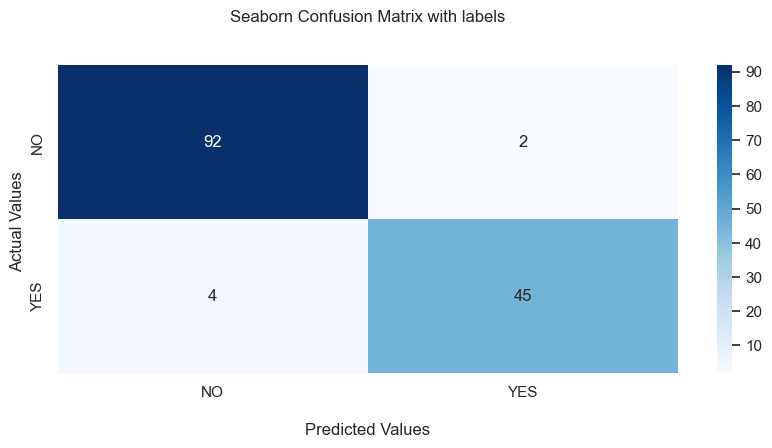

In [392]:
fig = plt.figure(figsize=(10, 4))
ax1 = sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')

ax1.set_title('Seaborn Confusion Matrix with labels\n\n');
ax1.set_xlabel('\nPredicted Values')
ax1.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax1.xaxis.set_ticklabels(['NO','YES'])
ax1.yaxis.set_ticklabels(['NO','YES'])

<b>CONFUSION MATRIX FOR THE NEURAL NETWORK MODEL</b>

In [221]:
explainer = shap.Explainer(model.predict,X_filter)

In [222]:
shap_values = explainer(X_filter)

22/22 [==============================] - 0s 2ms/step


Exact explainer:   4%|██▉                                                                     | 23/569 [00:00<?, ?it/s]

22/22 [==============================] - 0s 763us/step


Exact explainer:   4%|██▊                                                             | 25/569 [00:10<02:07,  4.27it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   5%|██▉                                                             | 26/569 [00:10<02:50,  3.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   5%|███                                                             | 27/569 [00:11<03:09,  2.86it/s]

22/22 [==============================] - 0s 777us/step


Exact explainer:   5%|███▏                                                            | 28/569 [00:11<03:22,  2.67it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   5%|███▎                                                            | 29/569 [00:12<03:26,  2.61it/s]

22/22 [==============================] - 0s 771us/step


Exact explainer:   5%|███▎                                                            | 30/569 [00:12<03:41,  2.43it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   5%|███▍                                                            | 31/569 [00:13<03:46,  2.37it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   6%|███▌                                                            | 32/569 [00:13<03:54,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   6%|███▋                                                            | 33/569 [00:13<03:56,  2.27it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:   6%|███▊                                                            | 34/569 [00:14<03:59,  2.23it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:   6%|███▉                                                            | 35/569 [00:15<04:15,  2.09it/s]

22/22 [==============================] - 0s 762us/step


Exact explainer:   6%|████                                                            | 36/569 [00:15<04:12,  2.11it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   7%|████▏                                                           | 37/569 [00:15<04:05,  2.16it/s]

22/22 [==============================] - 0s 762us/step


Exact explainer:   7%|████▎                                                           | 38/569 [00:16<03:56,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   7%|████▍                                                           | 39/569 [00:16<03:52,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   7%|████▍                                                           | 40/569 [00:17<03:49,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   7%|████▌                                                           | 41/569 [00:17<03:48,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   7%|████▋                                                           | 42/569 [00:18<03:55,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   8%|████▊                                                           | 43/569 [00:18<03:59,  2.20it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   8%|████▉                                                           | 44/569 [00:18<03:56,  2.22it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:   8%|█████                                                           | 45/569 [00:19<03:56,  2.22it/s]

22/22 [==============================] - 0s 777us/step


Exact explainer:   8%|█████▏                                                          | 46/569 [00:19<04:02,  2.16it/s]

22/22 [==============================] - 0s 771us/step


Exact explainer:   8%|█████▎                                                          | 47/569 [00:20<03:58,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   8%|█████▍                                                          | 48/569 [00:20<03:52,  2.24it/s]

22/22 [==============================] - 0s 770us/step


Exact explainer:   9%|█████▌                                                          | 49/569 [00:21<03:54,  2.22it/s]

22/22 [==============================] - 0s 906us/step


Exact explainer:   9%|█████▌                                                          | 50/569 [00:21<03:55,  2.20it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   9%|█████▋                                                          | 51/569 [00:22<03:54,  2.21it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:   9%|█████▊                                                          | 52/569 [00:22<03:51,  2.24it/s]

22/22 [==============================] - 0s 773us/step


Exact explainer:   9%|█████▉                                                          | 53/569 [00:23<03:50,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:   9%|██████                                                          | 54/569 [00:23<03:50,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  10%|██████▏                                                         | 55/569 [00:23<03:49,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  10%|██████▎                                                         | 56/569 [00:24<03:47,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  10%|██████▍                                                         | 57/569 [00:24<03:47,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  10%|██████▌                                                         | 58/569 [00:25<03:48,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  10%|██████▋                                                         | 59/569 [00:25<03:44,  2.27it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  11%|██████▋                                                         | 60/569 [00:26<03:43,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  11%|██████▊                                                         | 61/569 [00:26<03:54,  2.17it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  11%|██████▉                                                         | 62/569 [00:27<04:00,  2.11it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  11%|███████                                                         | 63/569 [00:27<04:03,  2.08it/s]

22/22 [==============================] - 0s 761us/step


Exact explainer:  11%|███████▏                                                        | 64/569 [00:28<03:58,  2.11it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  11%|███████▎                                                        | 65/569 [00:28<03:50,  2.18it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  12%|███████▍                                                        | 66/569 [00:28<03:44,  2.24it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  12%|███████▌                                                        | 67/569 [00:29<03:45,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  12%|███████▋                                                        | 68/569 [00:29<03:44,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  12%|███████▊                                                        | 69/569 [00:30<03:42,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  12%|███████▊                                                        | 70/569 [00:30<03:46,  2.20it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  12%|███████▉                                                        | 71/569 [00:31<03:43,  2.22it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  13%|████████                                                        | 72/569 [00:31<03:48,  2.17it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  13%|████████▏                                                       | 73/569 [00:32<03:56,  2.10it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  13%|████████▎                                                       | 74/569 [00:32<03:57,  2.08it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  13%|████████▍                                                       | 75/569 [00:33<04:04,  2.02it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  13%|████████▌                                                       | 76/569 [00:33<04:02,  2.03it/s]

22/22 [==============================] - 0s 861us/step


Exact explainer:  14%|████████▋                                                       | 77/569 [00:34<03:56,  2.08it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  14%|████████▊                                                       | 78/569 [00:34<03:47,  2.15it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  14%|████████▉                                                       | 79/569 [00:35<03:47,  2.16it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  14%|████████▉                                                       | 80/569 [00:35<03:47,  2.15it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  14%|█████████                                                       | 81/569 [00:35<03:39,  2.22it/s]

22/22 [==============================] - 0s 762us/step


Exact explainer:  14%|█████████▏                                                      | 82/569 [00:36<03:51,  2.10it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  15%|█████████▎                                                      | 83/569 [00:36<03:45,  2.15it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  15%|█████████▍                                                      | 84/569 [00:37<03:42,  2.18it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  15%|█████████▌                                                      | 85/569 [00:37<03:36,  2.24it/s]

22/22 [==============================] - 0s 762us/step


Exact explainer:  15%|█████████▋                                                      | 86/569 [00:38<03:33,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  15%|█████████▊                                                      | 87/569 [00:38<03:29,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  15%|█████████▉                                                      | 88/569 [00:39<03:26,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  16%|██████████                                                      | 89/569 [00:39<03:23,  2.36it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  16%|██████████                                                      | 90/569 [00:39<03:18,  2.41it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  16%|██████████▏                                                     | 91/569 [00:40<03:24,  2.34it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  16%|██████████▎                                                     | 92/569 [00:40<03:22,  2.35it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  16%|██████████▍                                                     | 93/569 [00:41<03:24,  2.33it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  17%|██████████▌                                                     | 94/569 [00:41<03:25,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  17%|██████████▋                                                     | 95/569 [00:42<03:28,  2.27it/s]

22/22 [==============================] - 0s 764us/step


Exact explainer:  17%|██████████▊                                                     | 96/569 [00:42<03:30,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  17%|██████████▉                                                     | 97/569 [00:42<03:30,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  17%|███████████                                                     | 98/569 [00:43<03:28,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  17%|███████████▏                                                    | 99/569 [00:43<03:29,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  18%|███████████                                                    | 100/569 [00:44<03:28,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  18%|███████████▏                                                   | 101/569 [00:44<03:30,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  18%|███████████▎                                                   | 102/569 [00:45<03:32,  2.20it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  18%|███████████▍                                                   | 103/569 [00:45<03:30,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  18%|███████████▌                                                   | 104/569 [00:46<03:29,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  18%|███████████▋                                                   | 105/569 [00:46<03:31,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  19%|███████████▋                                                   | 106/569 [00:46<03:27,  2.24it/s]

22/22 [==============================] - 0s 878us/step


Exact explainer:  19%|███████████▊                                                   | 107/569 [00:47<03:26,  2.24it/s]

22/22 [==============================] - 0s 763us/step


Exact explainer:  19%|███████████▉                                                   | 108/569 [00:47<03:24,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  19%|████████████                                                   | 109/569 [00:48<03:21,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  19%|████████████▏                                                  | 110/569 [00:48<03:24,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  20%|████████████▎                                                  | 111/569 [00:49<03:21,  2.27it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  20%|████████████▍                                                  | 112/569 [00:49<03:19,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  20%|████████████▌                                                  | 113/569 [00:50<03:18,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  20%|████████████▌                                                  | 114/569 [00:50<03:20,  2.26it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  20%|████████████▋                                                  | 115/569 [00:50<03:20,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  20%|████████████▊                                                  | 116/569 [00:51<03:23,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  21%|████████████▉                                                  | 117/569 [00:51<03:22,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  21%|█████████████                                                  | 118/569 [00:52<03:20,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  21%|█████████████▏                                                 | 119/569 [00:52<03:23,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  21%|█████████████▎                                                 | 120/569 [00:53<03:24,  2.20it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  21%|█████████████▍                                                 | 121/569 [00:53<03:25,  2.18it/s]

22/22 [==============================] - 0s 772us/step


Exact explainer:  21%|█████████████▌                                                 | 122/569 [00:54<03:17,  2.27it/s]

22/22 [==============================] - 0s 874us/step


Exact explainer:  22%|█████████████▌                                                 | 123/569 [00:54<03:09,  2.35it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  22%|█████████████▋                                                 | 124/569 [00:54<03:08,  2.36it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  22%|█████████████▊                                                 | 125/569 [00:55<03:04,  2.40it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  22%|█████████████▉                                                 | 126/569 [00:55<03:06,  2.38it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  22%|██████████████                                                 | 127/569 [00:56<03:03,  2.41it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  22%|██████████████▏                                                | 128/569 [00:56<03:09,  2.33it/s]

22/22 [==============================] - 0s 895us/step


Exact explainer:  23%|██████████████▎                                                | 129/569 [00:57<03:05,  2.37it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  23%|██████████████▍                                                | 130/569 [00:57<03:00,  2.44it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  23%|██████████████▌                                                | 131/569 [00:57<03:00,  2.42it/s]

22/22 [==============================] - 0s 776us/step


Exact explainer:  23%|██████████████▌                                                | 132/569 [00:58<03:02,  2.40it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  23%|██████████████▋                                                | 133/569 [00:58<03:03,  2.37it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  24%|██████████████▊                                                | 134/569 [00:59<03:07,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  24%|██████████████▉                                                | 135/569 [00:59<03:10,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  24%|███████████████                                                | 136/569 [00:59<03:06,  2.32it/s]

22/22 [==============================] - 0s 779us/step


Exact explainer:  24%|███████████████▏                                               | 137/569 [01:00<03:04,  2.34it/s]

22/22 [==============================] - 0s 784us/step


Exact explainer:  24%|███████████████▎                                               | 138/569 [01:00<03:03,  2.35it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  24%|███████████████▍                                               | 139/569 [01:01<03:09,  2.27it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  25%|███████████████▌                                               | 140/569 [01:01<03:18,  2.16it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  25%|███████████████▌                                               | 141/569 [01:02<03:24,  2.09it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  25%|███████████████▋                                               | 142/569 [01:02<03:24,  2.09it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  25%|███████████████▊                                               | 143/569 [01:03<03:23,  2.09it/s]

22/22 [==============================] - 0s 910us/step


Exact explainer:  25%|███████████████▉                                               | 144/569 [01:03<03:21,  2.11it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  25%|████████████████                                               | 145/569 [01:04<03:22,  2.10it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  26%|████████████████▏                                              | 146/569 [01:04<03:15,  2.16it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  26%|████████████████▎                                              | 147/569 [01:05<03:13,  2.18it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  26%|████████████████▍                                              | 148/569 [01:05<03:17,  2.13it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  26%|████████████████▍                                              | 149/569 [01:06<03:16,  2.14it/s]

22/22 [==============================] - 0s 763us/step


Exact explainer:  26%|████████████████▌                                              | 150/569 [01:06<03:11,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  27%|████████████████▋                                              | 151/569 [01:06<03:06,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  27%|████████████████▊                                              | 152/569 [01:07<03:04,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  27%|████████████████▉                                              | 153/569 [01:07<03:02,  2.28it/s]

22/22 [==============================] - 0s 784us/step


Exact explainer:  27%|█████████████████                                              | 154/569 [01:08<03:01,  2.29it/s]

22/22 [==============================] - 0s 763us/step


Exact explainer:  27%|█████████████████▏                                             | 155/569 [01:08<02:59,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  27%|█████████████████▎                                             | 156/569 [01:09<02:59,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  28%|█████████████████▍                                             | 157/569 [01:09<02:58,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  28%|█████████████████▍                                             | 158/569 [01:09<02:57,  2.31it/s]

22/22 [==============================] - 0s 780us/step


Exact explainer:  28%|█████████████████▌                                             | 159/569 [01:10<02:58,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  28%|█████████████████▋                                             | 160/569 [01:10<03:01,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  28%|█████████████████▊                                             | 161/569 [01:11<03:01,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  28%|█████████████████▉                                             | 162/569 [01:11<03:01,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  29%|██████████████████                                             | 163/569 [01:12<03:01,  2.24it/s]

22/22 [==============================] - 0s 784us/step


Exact explainer:  29%|██████████████████▏                                            | 164/569 [01:12<02:59,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  29%|██████████████████▎                                            | 165/569 [01:13<03:00,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  29%|██████████████████▍                                            | 166/569 [01:13<02:59,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  29%|██████████████████▍                                            | 167/569 [01:14<03:03,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  30%|██████████████████▌                                            | 168/569 [01:14<03:00,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  30%|██████████████████▋                                            | 169/569 [01:14<02:56,  2.27it/s]

22/22 [==============================] - 0s 761us/step


Exact explainer:  30%|██████████████████▊                                            | 170/569 [01:15<02:58,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  30%|██████████████████▉                                            | 171/569 [01:15<02:55,  2.27it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  30%|███████████████████                                            | 172/569 [01:16<02:58,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  30%|███████████████████▏                                           | 173/569 [01:16<03:00,  2.20it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  31%|███████████████████▎                                           | 174/569 [01:17<03:09,  2.09it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  31%|███████████████████▍                                           | 175/569 [01:17<03:10,  2.07it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  31%|███████████████████▍                                           | 176/569 [01:18<03:11,  2.05it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  31%|███████████████████▌                                           | 177/569 [01:18<03:08,  2.08it/s]

22/22 [==============================] - 0s 763us/step


Exact explainer:  31%|███████████████████▋                                           | 178/569 [01:19<03:03,  2.13it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  31%|███████████████████▊                                           | 179/569 [01:19<03:01,  2.15it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  32%|███████████████████▉                                           | 180/569 [01:20<03:03,  2.11it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  32%|████████████████████                                           | 181/569 [01:20<02:55,  2.21it/s]

22/22 [==============================] - 0s 883us/step


Exact explainer:  32%|████████████████████▏                                          | 182/569 [01:20<02:51,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  32%|████████████████████▎                                          | 183/569 [01:21<02:57,  2.17it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  32%|████████████████████▎                                          | 184/569 [01:21<02:58,  2.15it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  33%|████████████████████▍                                          | 185/569 [01:22<02:55,  2.19it/s]

22/22 [==============================] - 0s 778us/step


Exact explainer:  33%|████████████████████▌                                          | 186/569 [01:22<02:52,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  33%|████████████████████▋                                          | 187/569 [01:23<02:51,  2.23it/s]

22/22 [==============================] - 0s 781us/step


Exact explainer:  33%|████████████████████▊                                          | 188/569 [01:23<02:47,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  33%|████████████████████▉                                          | 189/569 [01:24<02:44,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  33%|█████████████████████                                          | 190/569 [01:24<02:42,  2.33it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  34%|█████████████████████▏                                         | 191/569 [01:24<02:40,  2.35it/s]

22/22 [==============================] - 0s 775us/step


Exact explainer:  34%|█████████████████████▎                                         | 192/569 [01:25<02:38,  2.38it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  34%|█████████████████████▎                                         | 193/569 [01:25<02:37,  2.39it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  34%|█████████████████████▍                                         | 194/569 [01:26<02:41,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  34%|█████████████████████▌                                         | 195/569 [01:26<02:44,  2.27it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  34%|█████████████████████▋                                         | 196/569 [01:27<02:44,  2.27it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  35%|█████████████████████▊                                         | 197/569 [01:27<02:45,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  35%|█████████████████████▉                                         | 198/569 [01:27<02:47,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  35%|██████████████████████                                         | 199/569 [01:28<02:47,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  35%|██████████████████████▏                                        | 200/569 [01:28<02:47,  2.21it/s]

22/22 [==============================] - 0s 985us/step


Exact explainer:  35%|██████████████████████▎                                        | 201/569 [01:29<02:45,  2.23it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  36%|██████████████████████▎                                        | 202/569 [01:29<02:46,  2.20it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  36%|██████████████████████▍                                        | 203/569 [01:30<02:48,  2.18it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  36%|██████████████████████▌                                        | 204/569 [01:30<02:46,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  36%|██████████████████████▋                                        | 205/569 [01:31<02:43,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  36%|██████████████████████▊                                        | 206/569 [01:31<02:38,  2.29it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  36%|██████████████████████▉                                        | 207/569 [01:31<02:38,  2.29it/s]

22/22 [==============================] - 0s 890us/step


Exact explainer:  37%|███████████████████████                                        | 208/569 [01:32<02:36,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  37%|███████████████████████▏                                       | 209/569 [01:32<02:36,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  37%|███████████████████████▎                                       | 210/569 [01:33<02:35,  2.31it/s]

22/22 [==============================] - 0s 769us/step


Exact explainer:  37%|███████████████████████▎                                       | 211/569 [01:33<02:37,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  37%|███████████████████████▍                                       | 212/569 [01:34<02:35,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  37%|███████████████████████▌                                       | 213/569 [01:34<02:34,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  38%|███████████████████████▋                                       | 214/569 [01:35<02:34,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  38%|███████████████████████▊                                       | 215/569 [01:35<02:33,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  38%|███████████████████████▉                                       | 216/569 [01:35<02:32,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  38%|████████████████████████                                       | 217/569 [01:36<02:32,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  38%|████████████████████████▏                                      | 218/569 [01:36<02:33,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  38%|████████████████████████▏                                      | 219/569 [01:37<02:30,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  39%|████████████████████████▎                                      | 220/569 [01:37<02:31,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  39%|████████████████████████▍                                      | 221/569 [01:38<02:29,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  39%|████████████████████████▌                                      | 222/569 [01:38<02:32,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  39%|████████████████████████▋                                      | 223/569 [01:38<02:30,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  39%|████████████████████████▊                                      | 224/569 [01:39<02:28,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  40%|████████████████████████▉                                      | 225/569 [01:39<02:29,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  40%|█████████████████████████                                      | 226/569 [01:40<02:33,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  40%|█████████████████████████▏                                     | 227/569 [01:40<02:27,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  40%|█████████████████████████▏                                     | 228/569 [01:41<02:27,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  40%|█████████████████████████▎                                     | 229/569 [01:41<02:27,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  40%|█████████████████████████▍                                     | 230/569 [01:41<02:24,  2.34it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  41%|█████████████████████████▌                                     | 231/569 [01:42<02:24,  2.35it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  41%|█████████████████████████▋                                     | 232/569 [01:42<02:31,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  41%|█████████████████████████▊                                     | 233/569 [01:43<02:28,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  41%|█████████████████████████▉                                     | 234/569 [01:43<02:25,  2.30it/s]

22/22 [==============================] - 0s 762us/step


Exact explainer:  41%|██████████████████████████                                     | 235/569 [01:44<02:26,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  41%|██████████████████████████▏                                    | 236/569 [01:44<02:24,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  42%|██████████████████████████▏                                    | 237/569 [01:45<02:22,  2.33it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  42%|██████████████████████████▎                                    | 238/569 [01:45<02:25,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  42%|██████████████████████████▍                                    | 239/569 [01:45<02:24,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  42%|██████████████████████████▌                                    | 240/569 [01:46<02:24,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  42%|██████████████████████████▋                                    | 241/569 [01:46<02:23,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  43%|██████████████████████████▊                                    | 242/569 [01:47<02:22,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  43%|██████████████████████████▉                                    | 243/569 [01:47<02:22,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  43%|███████████████████████████                                    | 244/569 [01:48<02:20,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  43%|███████████████████████████▏                                   | 245/569 [01:48<02:18,  2.34it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  43%|███████████████████████████▏                                   | 246/569 [01:48<02:20,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  43%|███████████████████████████▎                                   | 247/569 [01:49<02:22,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▍                                   | 248/569 [01:49<02:22,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▌                                   | 249/569 [01:50<02:20,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▋                                   | 250/569 [01:50<02:18,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▊                                   | 251/569 [01:51<02:18,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▉                                   | 252/569 [01:51<02:17,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  44%|████████████████████████████                                   | 253/569 [01:52<02:20,  2.26it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  45%|████████████████████████████                                   | 254/569 [01:52<02:21,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  45%|████████████████████████████▏                                  | 255/569 [01:52<02:24,  2.18it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  45%|████████████████████████████▎                                  | 256/569 [01:53<02:21,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  45%|████████████████████████████▍                                  | 257/569 [01:53<02:20,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  45%|████████████████████████████▌                                  | 258/569 [01:54<02:18,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  46%|████████████████████████████▋                                  | 259/569 [01:54<02:16,  2.27it/s]

22/22 [==============================] - 0s 767us/step


Exact explainer:  46%|████████████████████████████▊                                  | 260/569 [01:55<02:19,  2.21it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  46%|████████████████████████████▉                                  | 261/569 [01:55<02:17,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  46%|█████████████████████████████                                  | 262/569 [01:56<02:14,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  46%|█████████████████████████████                                  | 263/569 [01:56<02:15,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  46%|█████████████████████████████▏                                 | 264/569 [01:56<02:15,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████▎                                 | 265/569 [01:57<02:12,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████▍                                 | 266/569 [01:57<02:12,  2.28it/s]

22/22 [==============================] - 0s 780us/step


Exact explainer:  47%|█████████████████████████████▌                                 | 267/569 [01:58<02:12,  2.28it/s]

22/22 [==============================] - 0s 776us/step


Exact explainer:  47%|█████████████████████████████▋                                 | 268/569 [01:58<02:12,  2.27it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████▊                                 | 269/569 [01:59<02:12,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████▉                                 | 270/569 [01:59<02:13,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  48%|██████████████████████████████                                 | 271/569 [02:00<02:09,  2.29it/s]

22/22 [==============================] - 0s 774us/step


Exact explainer:  48%|██████████████████████████████                                 | 272/569 [02:00<02:07,  2.33it/s]

22/22 [==============================] - 0s 772us/step


Exact explainer:  48%|██████████████████████████████▏                                | 273/569 [02:00<02:13,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  48%|██████████████████████████████▎                                | 274/569 [02:01<02:13,  2.22it/s]

22/22 [==============================] - 0s 773us/step


Exact explainer:  48%|██████████████████████████████▍                                | 275/569 [02:01<02:08,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  49%|██████████████████████████████▌                                | 276/569 [02:02<02:06,  2.31it/s]

22/22 [==============================] - 0s 817us/step


Exact explainer:  49%|██████████████████████████████▋                                | 277/569 [02:02<02:08,  2.27it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  49%|██████████████████████████████▊                                | 278/569 [02:03<02:07,  2.28it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  49%|██████████████████████████████▉                                | 279/569 [02:03<02:07,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  49%|███████████████████████████████                                | 280/569 [02:04<02:09,  2.23it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  49%|███████████████████████████████                                | 281/569 [02:04<02:11,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  50%|███████████████████████████████▏                               | 282/569 [02:04<02:12,  2.17it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  50%|███████████████████████████████▎                               | 283/569 [02:05<02:11,  2.17it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  50%|███████████████████████████████▍                               | 284/569 [02:05<02:11,  2.16it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  50%|███████████████████████████████▌                               | 285/569 [02:06<02:14,  2.12it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  50%|███████████████████████████████▋                               | 286/569 [02:06<02:11,  2.16it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  50%|███████████████████████████████▊                               | 287/569 [02:07<02:10,  2.17it/s]

22/22 [==============================] - 0s 982us/step


Exact explainer:  51%|███████████████████████████████▉                               | 288/569 [02:07<02:11,  2.14it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  51%|███████████████████████████████▉                               | 289/569 [02:08<02:10,  2.14it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  51%|████████████████████████████████                               | 290/569 [02:08<02:08,  2.17it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  51%|████████████████████████████████▏                              | 291/569 [02:09<02:07,  2.18it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  51%|████████████████████████████████▎                              | 292/569 [02:09<02:02,  2.25it/s]

22/22 [==============================] - 0s 763us/step


Exact explainer:  51%|████████████████████████████████▍                              | 293/569 [02:09<01:58,  2.32it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  52%|████████████████████████████████▌                              | 294/569 [02:10<01:59,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▋                              | 295/569 [02:10<02:02,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▊                              | 296/569 [02:11<02:05,  2.18it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▉                              | 297/569 [02:11<02:05,  2.16it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▉                              | 298/569 [02:12<02:04,  2.17it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████████████████████████████████                              | 299/569 [02:12<02:07,  2.11it/s]

22/22 [==============================] - 0s 763us/step


Exact explainer:  53%|█████████████████████████████████▏                             | 300/569 [02:13<02:02,  2.20it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████████████████████████████████▎                             | 301/569 [02:13<02:00,  2.22it/s]

22/22 [==============================] - 0s 773us/step


Exact explainer:  53%|█████████████████████████████████▍                             | 302/569 [02:14<02:00,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████████████████████████████████▌                             | 303/569 [02:14<02:01,  2.18it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████████████████████████████████▋                             | 304/569 [02:14<01:59,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████████████████████████████████▊                             | 305/569 [02:15<01:57,  2.25it/s]

22/22 [==============================] - 0s 763us/step


Exact explainer:  54%|█████████████████████████████████▉                             | 306/569 [02:15<01:55,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████████████████████████████████▉                             | 307/569 [02:16<01:56,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  54%|██████████████████████████████████                             | 308/569 [02:16<01:56,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  54%|██████████████████████████████████▏                            | 309/569 [02:17<01:56,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  54%|██████████████████████████████████▎                            | 310/569 [02:17<01:56,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  55%|██████████████████████████████████▍                            | 311/569 [02:18<01:57,  2.20it/s]

22/22 [==============================] - 0s 764us/step


Exact explainer:  55%|██████████████████████████████████▌                            | 312/569 [02:18<01:54,  2.24it/s]

22/22 [==============================] - 0s 762us/step


Exact explainer:  55%|██████████████████████████████████▋                            | 313/569 [02:18<01:53,  2.25it/s]

22/22 [==============================] - 0s 762us/step


Exact explainer:  55%|██████████████████████████████████▊                            | 314/569 [02:19<01:52,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  55%|██████████████████████████████████▉                            | 315/569 [02:19<01:51,  2.27it/s]

22/22 [==============================] - 0s 772us/step


Exact explainer:  56%|██████████████████████████████████▉                            | 316/569 [02:20<01:48,  2.33it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  56%|███████████████████████████████████                            | 317/569 [02:20<01:49,  2.29it/s]

22/22 [==============================] - 0s 780us/step


Exact explainer:  56%|███████████████████████████████████▏                           | 318/569 [02:21<01:49,  2.28it/s]

22/22 [==============================] - 0s 776us/step


Exact explainer:  56%|███████████████████████████████████▎                           | 319/569 [02:21<01:47,  2.33it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  56%|███████████████████████████████████▍                           | 320/569 [02:21<01:45,  2.36it/s]

22/22 [==============================] - 0s 778us/step


Exact explainer:  56%|███████████████████████████████████▌                           | 321/569 [02:22<01:45,  2.36it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  57%|███████████████████████████████████▋                           | 322/569 [02:22<01:44,  2.35it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  57%|███████████████████████████████████▊                           | 323/569 [02:23<01:45,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  57%|███████████████████████████████████▊                           | 324/569 [02:23<01:45,  2.33it/s]

22/22 [==============================] - 0s 984us/step


Exact explainer:  57%|███████████████████████████████████▉                           | 325/569 [02:24<01:43,  2.35it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  57%|████████████████████████████████████                           | 326/569 [02:24<01:42,  2.36it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  57%|████████████████████████████████████▏                          | 327/569 [02:24<01:43,  2.34it/s]

22/22 [==============================] - 0s 768us/step


Exact explainer:  58%|████████████████████████████████████▎                          | 328/569 [02:25<01:40,  2.40it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  58%|████████████████████████████████████▍                          | 329/569 [02:25<01:39,  2.40it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  58%|████████████████████████████████████▌                          | 330/569 [02:26<01:40,  2.38it/s]

22/22 [==============================] - 0s 971us/step


Exact explainer:  58%|████████████████████████████████████▋                          | 331/569 [02:26<01:39,  2.39it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  58%|████████████████████████████████████▊                          | 332/569 [02:27<01:40,  2.36it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  59%|████████████████████████████████████▊                          | 333/569 [02:27<01:38,  2.39it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  59%|████████████████████████████████████▉                          | 334/569 [02:27<01:38,  2.39it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████████████████████████████████████                          | 335/569 [02:28<01:38,  2.38it/s]

22/22 [==============================] - 0s 868us/step


Exact explainer:  59%|█████████████████████████████████████▏                         | 336/569 [02:28<01:37,  2.40it/s]

22/22 [==============================] - 0s 978us/step


Exact explainer:  59%|█████████████████████████████████████▎                         | 337/569 [02:29<01:37,  2.38it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  59%|█████████████████████████████████████▍                         | 338/569 [02:29<01:36,  2.40it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████████████████████████████████████▌                         | 339/569 [02:29<01:36,  2.37it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████████████████████████████████████▋                         | 340/569 [02:30<01:36,  2.38it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████████████████████████████████████▊                         | 341/569 [02:30<01:34,  2.41it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  60%|█████████████████████████████████████▊                         | 342/569 [02:31<01:34,  2.40it/s]

22/22 [==============================] - 0s 771us/step


Exact explainer:  60%|█████████████████████████████████████▉                         | 343/569 [02:31<01:32,  2.43it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  60%|██████████████████████████████████████                         | 344/569 [02:32<01:33,  2.41it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████████████████████████████████████▏                        | 345/569 [02:32<01:38,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████████████████████████████████████▎                        | 346/569 [02:32<01:39,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████████████████████████████████████▍                        | 347/569 [02:33<01:39,  2.22it/s]

22/22 [==============================] - 0s 773us/step


Exact explainer:  61%|██████████████████████████████████████▌                        | 348/569 [02:33<01:38,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  61%|██████████████████████████████████████▋                        | 349/569 [02:34<01:36,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████████████████████████████████████▊                        | 350/569 [02:34<01:35,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████████████████████████████████████▊                        | 351/569 [02:35<01:33,  2.32it/s]

22/22 [==============================] - 0s 880us/step


Exact explainer:  62%|██████████████████████████████████████▉                        | 352/569 [02:35<01:33,  2.33it/s]

22/22 [==============================] - 0s 882us/step


Exact explainer:  62%|███████████████████████████████████████                        | 353/569 [02:36<01:31,  2.36it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  62%|███████████████████████████████████████▏                       | 354/569 [02:36<01:31,  2.36it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  62%|███████████████████████████████████████▎                       | 355/569 [02:36<01:33,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  63%|███████████████████████████████████████▍                       | 356/569 [02:37<01:29,  2.39it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  63%|███████████████████████████████████████▌                       | 357/569 [02:37<01:28,  2.41it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  63%|███████████████████████████████████████▋                       | 358/569 [02:38<01:27,  2.40it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  63%|███████████████████████████████████████▋                       | 359/569 [02:38<01:25,  2.45it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  63%|███████████████████████████████████████▊                       | 360/569 [02:38<01:25,  2.44it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  63%|███████████████████████████████████████▉                       | 361/569 [02:39<01:25,  2.43it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  64%|████████████████████████████████████████                       | 362/569 [02:39<01:27,  2.37it/s]

22/22 [==============================] - 0s 789us/step


Exact explainer:  64%|████████████████████████████████████████▏                      | 363/569 [02:40<01:26,  2.38it/s]

22/22 [==============================] - 0s 903us/step


Exact explainer:  64%|████████████████████████████████████████▎                      | 364/569 [02:40<01:25,  2.39it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  64%|████████████████████████████████████████▍                      | 365/569 [02:40<01:24,  2.41it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  64%|████████████████████████████████████████▌                      | 366/569 [02:41<01:24,  2.40it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  64%|████████████████████████████████████████▋                      | 367/569 [02:41<01:24,  2.39it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  65%|████████████████████████████████████████▋                      | 368/569 [02:42<01:26,  2.33it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  65%|████████████████████████████████████████▊                      | 369/569 [02:42<01:26,  2.31it/s]

22/22 [==============================] - 0s 782us/step


Exact explainer:  65%|████████████████████████████████████████▉                      | 370/569 [02:43<02:07,  1.56it/s]

22/22 [==============================] - 0s 770us/step


Exact explainer:  65%|█████████████████████████████████████████                      | 371/569 [02:44<01:51,  1.77it/s]

22/22 [==============================] - 0s 876us/step


Exact explainer:  65%|█████████████████████████████████████████▏                     | 372/569 [02:44<01:43,  1.91it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  66%|█████████████████████████████████████████▎                     | 373/569 [02:45<01:36,  2.02it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  66%|█████████████████████████████████████████▍                     | 374/569 [02:45<01:31,  2.13it/s]

22/22 [==============================] - 0s 762us/step


Exact explainer:  66%|█████████████████████████████████████████▌                     | 375/569 [02:45<01:28,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  66%|█████████████████████████████████████████▋                     | 376/569 [02:46<01:30,  2.14it/s]

22/22 [==============================] - 0s 774us/step


Exact explainer:  66%|█████████████████████████████████████████▋                     | 377/569 [02:46<01:26,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  66%|█████████████████████████████████████████▊                     | 378/569 [02:47<01:24,  2.27it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  67%|█████████████████████████████████████████▉                     | 379/569 [02:47<01:22,  2.30it/s]

22/22 [==============================] - 0s 910us/step


Exact explainer:  67%|██████████████████████████████████████████                     | 380/569 [02:48<01:21,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████████████████████████████████████████▏                    | 381/569 [02:48<01:19,  2.37it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████████████████████████████████████████▎                    | 382/569 [02:48<01:18,  2.39it/s]

22/22 [==============================] - 0s 902us/step


Exact explainer:  67%|██████████████████████████████████████████▍                    | 383/569 [02:49<01:17,  2.41it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  67%|██████████████████████████████████████████▌                    | 384/569 [02:49<01:16,  2.40it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████████████████████████████████████████▋                    | 385/569 [02:50<01:16,  2.40it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████████████████████████████████████████▋                    | 386/569 [02:50<01:15,  2.43it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  68%|██████████████████████████████████████████▊                    | 387/569 [02:51<01:16,  2.38it/s]

22/22 [==============================] - 0s 876us/step


Exact explainer:  68%|██████████████████████████████████████████▉                    | 388/569 [02:51<01:15,  2.38it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  68%|███████████████████████████████████████████                    | 389/569 [02:51<01:15,  2.39it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  69%|███████████████████████████████████████████▏                   | 390/569 [02:52<01:15,  2.36it/s]

22/22 [==============================] - 0s 764us/step


Exact explainer:  69%|███████████████████████████████████████████▎                   | 391/569 [02:52<01:15,  2.35it/s]

22/22 [==============================] - 0s 764us/step


Exact explainer:  69%|███████████████████████████████████████████▍                   | 392/569 [02:53<01:14,  2.36it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  69%|███████████████████████████████████████████▌                   | 393/569 [02:53<01:14,  2.36it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  69%|███████████████████████████████████████████▌                   | 394/569 [02:53<01:12,  2.42it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  69%|███████████████████████████████████████████▋                   | 395/569 [02:54<01:12,  2.41it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████████████████████████████████████████▊                   | 396/569 [02:54<01:13,  2.36it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  70%|███████████████████████████████████████████▉                   | 397/569 [02:55<01:11,  2.42it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  70%|████████████████████████████████████████████                   | 398/569 [02:55<01:20,  2.13it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  70%|████████████████████████████████████████████▏                  | 399/569 [02:56<01:17,  2.18it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  70%|████████████████████████████████████████████▎                  | 400/569 [02:56<01:16,  2.20it/s]

22/22 [==============================] - 0s 889us/step


Exact explainer:  70%|████████████████████████████████████████████▍                  | 401/569 [02:57<01:15,  2.22it/s]

22/22 [==============================] - 0s 779us/step


Exact explainer:  71%|████████████████████████████████████████████▌                  | 402/569 [02:57<01:14,  2.24it/s]

22/22 [==============================] - 0s 770us/step


Exact explainer:  71%|████████████████████████████████████████████▌                  | 403/569 [02:57<01:12,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  71%|████████████████████████████████████████████▋                  | 404/569 [02:58<01:10,  2.34it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  71%|████████████████████████████████████████████▊                  | 405/569 [02:58<01:12,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  71%|████████████████████████████████████████████▉                  | 406/569 [02:59<01:11,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  72%|█████████████████████████████████████████████                  | 407/569 [02:59<01:12,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  72%|█████████████████████████████████████████████▏                 | 408/569 [03:00<01:11,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  72%|█████████████████████████████████████████████▎                 | 409/569 [03:00<01:10,  2.27it/s]

22/22 [==============================] - 0s 769us/step


Exact explainer:  72%|█████████████████████████████████████████████▍                 | 410/569 [03:01<01:08,  2.32it/s]

22/22 [==============================] - 0s 776us/step


Exact explainer:  72%|█████████████████████████████████████████████▌                 | 411/569 [03:01<01:11,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  72%|█████████████████████████████████████████████▌                 | 412/569 [03:01<01:09,  2.26it/s]

22/22 [==============================] - 0s 892us/step


Exact explainer:  73%|█████████████████████████████████████████████▋                 | 413/569 [03:02<01:10,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  73%|█████████████████████████████████████████████▊                 | 414/569 [03:02<01:10,  2.20it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  73%|█████████████████████████████████████████████▉                 | 415/569 [03:03<01:09,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  73%|██████████████████████████████████████████████                 | 416/569 [03:03<01:09,  2.21it/s]

22/22 [==============================] - 0s 955us/step


Exact explainer:  73%|██████████████████████████████████████████████▏                | 417/569 [03:04<01:10,  2.16it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  73%|██████████████████████████████████████████████▎                | 418/569 [03:04<01:09,  2.17it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  74%|██████████████████████████████████████████████▍                | 419/569 [03:05<01:07,  2.21it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  74%|██████████████████████████████████████████████▌                | 420/569 [03:05<01:08,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  74%|██████████████████████████████████████████████▌                | 421/569 [03:06<01:07,  2.19it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  74%|██████████████████████████████████████████████▋                | 422/569 [03:06<01:10,  2.09it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  74%|██████████████████████████████████████████████▊                | 423/569 [03:07<01:09,  2.09it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  75%|██████████████████████████████████████████████▉                | 424/569 [03:07<01:09,  2.07it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  75%|███████████████████████████████████████████████                | 425/569 [03:08<01:10,  2.05it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  75%|███████████████████████████████████████████████▏               | 426/569 [03:08<01:10,  2.04it/s]

22/22 [==============================] - 0s 762us/step


Exact explainer:  75%|███████████████████████████████████████████████▎               | 427/569 [03:09<01:08,  2.07it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████████████████████████████████████████████▍               | 428/569 [03:09<01:05,  2.14it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  75%|███████████████████████████████████████████████▍               | 429/569 [03:09<01:03,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████████████████████████████████████████████▌               | 430/569 [03:10<01:02,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████████████████████████████████████████████▋               | 431/569 [03:10<01:01,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  76%|███████████████████████████████████████████████▊               | 432/569 [03:11<01:03,  2.17it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  76%|███████████████████████████████████████████████▉               | 433/569 [03:11<01:03,  2.14it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  76%|████████████████████████████████████████████████               | 434/569 [03:12<01:02,  2.15it/s]

22/22 [==============================] - 0s 763us/step


Exact explainer:  76%|████████████████████████████████████████████████▏              | 435/569 [03:12<01:00,  2.20it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  77%|████████████████████████████████████████████████▎              | 436/569 [03:13<00:59,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  77%|████████████████████████████████████████████████▍              | 437/569 [03:13<00:59,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  77%|████████████████████████████████████████████████▍              | 438/569 [03:14<01:00,  2.16it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  77%|████████████████████████████████████████████████▌              | 439/569 [03:14<00:58,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  77%|████████████████████████████████████████████████▋              | 440/569 [03:14<00:57,  2.23it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  78%|████████████████████████████████████████████████▊              | 441/569 [03:15<00:58,  2.19it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  78%|████████████████████████████████████████████████▉              | 442/569 [03:15<00:58,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  78%|█████████████████████████████████████████████████              | 443/569 [03:16<00:57,  2.19it/s]

22/22 [==============================] - 0s 968us/step


Exact explainer:  78%|█████████████████████████████████████████████████▏             | 444/569 [03:16<00:56,  2.20it/s]

22/22 [==============================] - 0s 780us/step


Exact explainer:  78%|█████████████████████████████████████████████████▎             | 445/569 [03:17<00:56,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  78%|█████████████████████████████████████████████████▍             | 446/569 [03:17<00:53,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  79%|█████████████████████████████████████████████████▍             | 447/569 [03:17<00:53,  2.29it/s]

22/22 [==============================] - 0s 776us/step


Exact explainer:  79%|█████████████████████████████████████████████████▌             | 448/569 [03:18<00:51,  2.35it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  79%|█████████████████████████████████████████████████▋             | 449/569 [03:18<00:51,  2.33it/s]

22/22 [==============================] - 0s 880us/step


Exact explainer:  79%|█████████████████████████████████████████████████▊             | 450/569 [03:19<00:50,  2.37it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  79%|█████████████████████████████████████████████████▉             | 451/569 [03:19<00:50,  2.32it/s]

22/22 [==============================] - 0s 780us/step


Exact explainer:  79%|██████████████████████████████████████████████████             | 452/569 [03:20<00:50,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  80%|██████████████████████████████████████████████████▏            | 453/569 [03:20<00:49,  2.34it/s]

22/22 [==============================] - 0s 786us/step


Exact explainer:  80%|██████████████████████████████████████████████████▎            | 454/569 [03:20<00:49,  2.31it/s]

22/22 [==============================] - 0s 778us/step


Exact explainer:  80%|██████████████████████████████████████████████████▍            | 455/569 [03:21<00:49,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  80%|██████████████████████████████████████████████████▍            | 456/569 [03:21<00:48,  2.31it/s]

22/22 [==============================] - 0s 775us/step


Exact explainer:  80%|██████████████████████████████████████████████████▌            | 457/569 [03:22<00:47,  2.34it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  80%|██████████████████████████████████████████████████▋            | 458/569 [03:22<00:47,  2.35it/s]

22/22 [==============================] - 0s 774us/step


Exact explainer:  81%|██████████████████████████████████████████████████▊            | 459/569 [03:23<00:46,  2.35it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  81%|██████████████████████████████████████████████████▉            | 460/569 [03:23<00:46,  2.35it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  81%|███████████████████████████████████████████████████            | 461/569 [03:23<00:47,  2.29it/s]

22/22 [==============================] - 0s 783us/step


Exact explainer:  81%|███████████████████████████████████████████████████▏           | 462/569 [03:24<00:46,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  81%|███████████████████████████████████████████████████▎           | 463/569 [03:24<00:45,  2.32it/s]

22/22 [==============================] - 0s 781us/step


Exact explainer:  82%|███████████████████████████████████████████████████▎           | 464/569 [03:25<00:45,  2.33it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  82%|███████████████████████████████████████████████████▍           | 465/569 [03:25<00:46,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  82%|███████████████████████████████████████████████████▌           | 466/569 [03:26<00:46,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  82%|███████████████████████████████████████████████████▋           | 467/569 [03:26<00:46,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  82%|███████████████████████████████████████████████████▊           | 468/569 [03:27<00:45,  2.20it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  82%|███████████████████████████████████████████████████▉           | 469/569 [03:27<00:46,  2.16it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████████████████████████████████████████████████           | 470/569 [03:28<00:46,  2.14it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  83%|████████████████████████████████████████████████████▏          | 471/569 [03:28<00:45,  2.15it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████████████████████████████████████████████████▎          | 472/569 [03:28<00:44,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████████████████████████████████████████████████▎          | 473/569 [03:29<00:43,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████████████████████████████████████████████████▍          | 474/569 [03:29<00:43,  2.20it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  83%|████████████████████████████████████████████████████▌          | 475/569 [03:30<00:41,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████████████████████████████████████████████████▋          | 476/569 [03:30<00:41,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  84%|████████████████████████████████████████████████████▊          | 477/569 [03:31<00:41,  2.22it/s]

22/22 [==============================] - 0s 948us/step


Exact explainer:  84%|████████████████████████████████████████████████████▉          | 478/569 [03:31<00:42,  2.16it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  84%|█████████████████████████████████████████████████████          | 479/569 [03:32<00:41,  2.14it/s]

22/22 [==============================] - 0s 878us/step


Exact explainer:  84%|█████████████████████████████████████████████████████▏         | 480/569 [03:32<00:40,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  85%|█████████████████████████████████████████████████████▎         | 481/569 [03:33<00:39,  2.23it/s]

22/22 [==============================] - 0s 786us/step


Exact explainer:  85%|█████████████████████████████████████████████████████▎         | 482/569 [03:33<00:38,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  85%|█████████████████████████████████████████████████████▍         | 483/569 [03:33<00:37,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  85%|█████████████████████████████████████████████████████▌         | 484/569 [03:34<00:37,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  85%|█████████████████████████████████████████████████████▋         | 485/569 [03:34<00:36,  2.28it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  85%|█████████████████████████████████████████████████████▊         | 486/569 [03:35<00:36,  2.27it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  86%|█████████████████████████████████████████████████████▉         | 487/569 [03:35<00:35,  2.32it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  86%|██████████████████████████████████████████████████████         | 488/569 [03:36<00:35,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  86%|██████████████████████████████████████████████████████▏        | 489/569 [03:36<00:34,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  86%|██████████████████████████████████████████████████████▎        | 490/569 [03:36<00:33,  2.34it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  86%|██████████████████████████████████████████████████████▎        | 491/569 [03:37<00:33,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  86%|██████████████████████████████████████████████████████▍        | 492/569 [03:37<00:33,  2.33it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  87%|██████████████████████████████████████████████████████▌        | 493/569 [03:38<00:31,  2.38it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  87%|██████████████████████████████████████████████████████▋        | 494/569 [03:38<00:31,  2.40it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  87%|██████████████████████████████████████████████████████▊        | 495/569 [03:39<00:30,  2.42it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  87%|██████████████████████████████████████████████████████▉        | 496/569 [03:39<00:30,  2.41it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  87%|███████████████████████████████████████████████████████        | 497/569 [03:39<00:30,  2.40it/s]

22/22 [==============================] - 0s 773us/step


Exact explainer:  88%|███████████████████████████████████████████████████████▏       | 498/569 [03:40<00:29,  2.39it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  88%|███████████████████████████████████████████████████████▏       | 499/569 [03:40<00:29,  2.34it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  88%|███████████████████████████████████████████████████████▎       | 500/569 [03:41<00:28,  2.39it/s]

22/22 [==============================] - 0s 786us/step


Exact explainer:  88%|███████████████████████████████████████████████████████▍       | 501/569 [03:41<00:28,  2.41it/s]

22/22 [==============================] - 0s 792us/step


Exact explainer:  88%|███████████████████████████████████████████████████████▌       | 502/569 [03:41<00:27,  2.42it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  88%|███████████████████████████████████████████████████████▋       | 503/569 [03:42<00:27,  2.42it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  89%|███████████████████████████████████████████████████████▊       | 504/569 [03:42<00:27,  2.39it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  89%|███████████████████████████████████████████████████████▉       | 505/569 [03:43<00:26,  2.41it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████████████████████████████████████████████████████       | 506/569 [03:43<00:26,  2.40it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████████████████████████████████████████████████████▏      | 507/569 [03:44<00:26,  2.38it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████████████████████████████████████████████████████▏      | 508/569 [03:44<00:25,  2.39it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  89%|████████████████████████████████████████████████████████▎      | 509/569 [03:44<00:25,  2.36it/s]

22/22 [==============================] - 0s 926us/step


Exact explainer:  90%|████████████████████████████████████████████████████████▍      | 510/569 [03:45<00:25,  2.33it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████████████████████████████████████████████████████▌      | 511/569 [03:45<00:25,  2.24it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  90%|████████████████████████████████████████████████████████▋      | 512/569 [03:46<00:25,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  90%|████████████████████████████████████████████████████████▊      | 513/569 [03:46<00:25,  2.17it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  90%|████████████████████████████████████████████████████████▉      | 514/569 [03:47<00:25,  2.15it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████████████████████████████████████████████████████      | 515/569 [03:47<00:25,  2.14it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████████████████████████████████████████████████████▏     | 516/569 [03:48<00:25,  2.11it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  91%|█████████████████████████████████████████████████████████▏     | 517/569 [03:48<00:24,  2.14it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  91%|█████████████████████████████████████████████████████████▎     | 518/569 [03:49<00:23,  2.18it/s]

22/22 [==============================] - 0s 787us/step


Exact explainer:  91%|█████████████████████████████████████████████████████████▍     | 519/569 [03:49<00:22,  2.22it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  91%|█████████████████████████████████████████████████████████▌     | 520/569 [03:49<00:22,  2.22it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  92%|█████████████████████████████████████████████████████████▋     | 521/569 [03:50<00:21,  2.19it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████████████████████████████████████████████████████▊     | 522/569 [03:50<00:21,  2.16it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  92%|█████████████████████████████████████████████████████████▉     | 523/569 [03:51<00:21,  2.16it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  92%|██████████████████████████████████████████████████████████     | 524/569 [03:51<00:20,  2.15it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  92%|██████████████████████████████████████████████████████████▏    | 525/569 [03:52<00:20,  2.14it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  92%|██████████████████████████████████████████████████████████▏    | 526/569 [03:52<00:19,  2.17it/s]

22/22 [==============================] - 0s 775us/step


Exact explainer:  93%|██████████████████████████████████████████████████████████▎    | 527/569 [03:53<00:18,  2.24it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  93%|██████████████████████████████████████████████████████████▍    | 528/569 [03:53<00:18,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  93%|██████████████████████████████████████████████████████████▌    | 529/569 [03:54<00:17,  2.23it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  93%|██████████████████████████████████████████████████████████▋    | 530/569 [03:54<00:17,  2.22it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  93%|██████████████████████████████████████████████████████████▊    | 531/569 [03:55<00:17,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  93%|██████████████████████████████████████████████████████████▉    | 532/569 [03:55<00:16,  2.23it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  94%|███████████████████████████████████████████████████████████    | 533/569 [03:55<00:15,  2.28it/s]

22/22 [==============================] - 0s 888us/step


Exact explainer:  94%|███████████████████████████████████████████████████████████    | 534/569 [03:56<00:15,  2.26it/s]

22/22 [==============================] - 0s 788us/step


Exact explainer:  94%|███████████████████████████████████████████████████████████▏   | 535/569 [03:56<00:16,  2.11it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  94%|███████████████████████████████████████████████████████████▎   | 536/569 [03:57<00:15,  2.17it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  94%|███████████████████████████████████████████████████████████▍   | 537/569 [03:57<00:14,  2.21it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  95%|███████████████████████████████████████████████████████████▌   | 538/569 [03:58<00:13,  2.25it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  95%|███████████████████████████████████████████████████████████▋   | 539/569 [03:58<00:13,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  95%|███████████████████████████████████████████████████████████▊   | 540/569 [03:59<00:12,  2.27it/s]

22/22 [==============================] - 0s 771us/step


Exact explainer:  95%|███████████████████████████████████████████████████████████▉   | 541/569 [03:59<00:11,  2.36it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  95%|████████████████████████████████████████████████████████████   | 542/569 [03:59<00:11,  2.30it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  95%|████████████████████████████████████████████████████████████   | 543/569 [04:00<00:11,  2.31it/s]

22/22 [==============================] - 0s 770us/step


Exact explainer:  96%|████████████████████████████████████████████████████████████▏  | 544/569 [04:00<00:10,  2.33it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  96%|████████████████████████████████████████████████████████████▎  | 545/569 [04:01<00:10,  2.31it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  96%|████████████████████████████████████████████████████████████▍  | 546/569 [04:01<00:10,  2.27it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  96%|████████████████████████████████████████████████████████████▌  | 547/569 [04:02<00:09,  2.28it/s]

22/22 [==============================] - 0s 775us/step


Exact explainer:  96%|████████████████████████████████████████████████████████████▋  | 548/569 [04:02<00:09,  2.32it/s]

22/22 [==============================] - 0s 776us/step


Exact explainer:  96%|████████████████████████████████████████████████████████████▊  | 549/569 [04:02<00:08,  2.34it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  97%|████████████████████████████████████████████████████████████▉  | 550/569 [04:03<00:07,  2.39it/s]

22/22 [==============================] - 0s 771us/step


Exact explainer:  97%|█████████████████████████████████████████████████████████████  | 551/569 [04:03<00:07,  2.43it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████████████████████████████████████████████████████████  | 552/569 [04:04<00:06,  2.43it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  97%|█████████████████████████████████████████████████████████████▏ | 553/569 [04:04<00:06,  2.43it/s]

22/22 [==============================] - 0s 900us/step


Exact explainer:  97%|█████████████████████████████████████████████████████████████▎ | 554/569 [04:04<00:06,  2.42it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████████████████████████████████████████████████████████▍ | 555/569 [04:05<00:05,  2.45it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████████████████████████████████████████████████████████▌ | 556/569 [04:05<00:05,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████████████████████████████████████████████████████████▋ | 557/569 [04:06<00:05,  2.32it/s]

22/22 [==============================] - 0s 2ms/step


Exact explainer:  98%|█████████████████████████████████████████████████████████████▊ | 558/569 [04:06<00:04,  2.29it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  98%|█████████████████████████████████████████████████████████████▉ | 559/569 [04:07<00:04,  2.26it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  98%|██████████████████████████████████████████████████████████████ | 560/569 [04:07<00:03,  2.32it/s]

22/22 [==============================] - 0s 782us/step


Exact explainer:  99%|██████████████████████████████████████████████████████████████ | 561/569 [04:07<00:03,  2.34it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  99%|██████████████████████████████████████████████████████████████▏| 562/569 [04:08<00:02,  2.38it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  99%|██████████████████████████████████████████████████████████████▎| 563/569 [04:08<00:02,  2.42it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  99%|██████████████████████████████████████████████████████████████▍| 564/569 [04:09<00:02,  2.41it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer:  99%|██████████████████████████████████████████████████████████████▌| 565/569 [04:09<00:01,  2.41it/s]

22/22 [==============================] - 0s 774us/step


Exact explainer:  99%|██████████████████████████████████████████████████████████████▋| 566/569 [04:10<00:01,  2.37it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer: 100%|██████████████████████████████████████████████████████████████▊| 567/569 [04:10<00:00,  2.37it/s]

22/22 [==============================] - 0s 1ms/step


Exact explainer: 100%|██████████████████████████████████████████████████████████████▉| 568/569 [04:10<00:00,  2.38it/s]

22/22 [==============================] - 0s 775us/step


Exact explainer: 100%|███████████████████████████████████████████████████████████████| 569/569 [04:11<00:00,  2.37it/s]

22/22 [==============================] - 0s 771us/step


Exact explainer: 570it [04:11,  2.17it/s]                                                                              


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


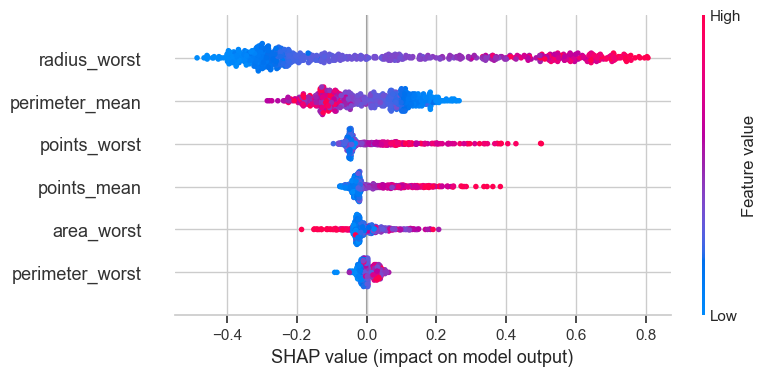

In [227]:
shap.plots.beeswarm(shap_values)

<span style="color:indigo;"><b>We could see a low radius_worst value will negatively impact the model, similar for points_worst and points_mean wheareas its vice versa in the case of perimeter_mean</span></b>